# Discrete Uniform Function

In [253]:
import matplotlib.pyplot as plt
import numpy as np

In [254]:
# Number of dice rolls
num_rolls = 6

In [255]:
# Calculate probability of each outcome(1 to 6)
probabilities = np.ones(6) / 6

In [256]:
# Calculate the CDF (Cumulative Distribution Function)
cdf = np.cumsum(probabilities)

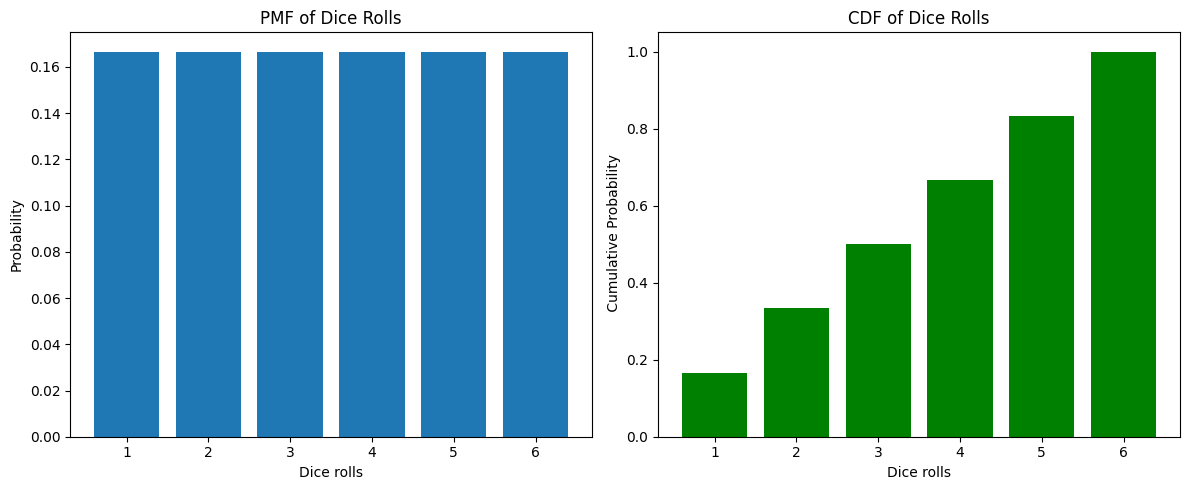

In [257]:
# Plot the PMF and CDF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(range(1,7), probabilities)
plt.xlabel("Dice rolls")
plt.ylabel("Probability")
plt.title("PMF of Dice Rolls")

plt.subplot(1,2,2)
plt.bar(range(1,7),cdf, color='green')
plt.xlabel("Dice rolls")
plt.ylabel(" Cumulative Probability")
plt.title("CDF of Dice Rolls")

plt.tight_layout()
plt.show()

# Discrete Binomial Distribution

In [258]:
from scipy.stats import binom

In [259]:
# Given values
n = 5   # Total Number of students
k = 3   # Number of students who like Python
p = 0.66    # Probability that a student like Python

# Calcualte binomial probability
probability = binom.pmf(k,n,p)
print(f"The probability that exactly {k} out of {n} students like Python is : {probability:.4f}")
# pp = binom.cdf(6,n,p)
# print("pp: ", pp)

The probability that exactly 3 out of 5 students like Python is : 0.3323


-  65% of all students who appear for CDAC entrance test clear it. 50 Students from coaching class has appeared for test . What is the probability that none of the stidens will clear it. What is teh probability that more than 40 will clear it? (Use binom.cdf() function)

In [260]:

n = 50  # number of students
p = 0.65  # probability of success (clearing the test)

# Probability that none of the students will clear the test
P_none_clear = binom.pmf(0, n, p)


# Probability that more than 40 students will clear the test
P_more_than_40 = 1 - binom.cdf(40, n, p)


print("Probability that none of the students clear the test:", P_none_clear)
print("Probability that more than 40 students clear the test:", P_more_than_40)


Probability that none of the students clear the test: 1.5973578394644818e-23
Probability that more than 40 students clear the test: 0.00669792345591147


- Hospital records show that of patients suffering from a specific disease, 75% die of it. What is the probability that 6 randomly selected patients, four will recover?

In [261]:
n = 6  # number of patients
p = 0.25  # probability of recovery
x = 4  # number of recoveries

# Probability that exactly 4 patients recover
P_4_recover = binom.pmf(x, n, p)

# Print result
print("Probability that exactly 4 patients recover:", P_4_recover)


Probability that exactly 4 patients recover: 0.03295898437499997


## Understanding PMF and CDF

- using the tips.csv dataset

In [262]:
import pandas as pd


In [263]:
tips_df = pd.read_csv('./data_pd/tips.csv')

In [264]:
tips_df.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251


In [265]:
# Binary outcome : Success if (tip / tota_bill) > 0.15, otherwise Failure
def classify_tip(row):
    total_bill = row['total_bill']
    tip = row['tip']
    if (tip/ total_bill) > 0.15:
        return 1
    else:
        return 0
    

In [266]:
# Apply the function to create binary column
tips_df['tip_binary'] = tips_df.apply(classify_tip, axis=1)

In [267]:
tips_df.head()

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,tip_binary
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959,0
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608,1
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458,1
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260,0
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251,0


In [268]:
# Total number of trials (total observation)
n = len(tips_df)    # 244
# n

In [269]:
# Number of success (tips where tip/total_bill > 0.15)
k = tips_df['tip_binary'].sum()     #135
hypothetical_k = 50
# k

In [270]:
# Probability of success (p)
p = k/n

In [271]:
# Defined number of trials for binomial distribution
trials = 100

# Binomial distribution of exactly k success in trials
probability = binom.pmf(hypothetical_k, trials, p)
# probability

# Exact Binomial Probability for 60% success (60 out of 100 trials)
min_desired_successes = int(0.6*trials)
exact_probability_60 = binom.pmf(min_desired_successes, trials, p)      #0.05203399017582368
# exact_probability_60

# just to calculate it at 65% success
exact_probability_65 = binom.pmf(65,trials,p)   #0.012080377300686505
# exact_probability_60


In [272]:
# Cumulative probabilty for 60% success (60 out of 100 trials)
cumulative_prob = binom.cdf(min_desired_successes, trials,p)        #0.8509975072217885
# cumulative_prob

In [273]:
# Output the result
print(f"Total Trials (n): {n}")
print(f"Number of successes (k): {k}")
print(f"Probability of successes (p): {p:.4f}")
print(f"Binomial Probability of exactly {hypothetical_k} successes in {trials} trials: {probability:.4f}")
print(f"Exact Binomial probability at 60% success (60 out of {trials}) : {exact_probability_60:.4f}")
print(f"Cumulative probability at 60 or fewer successes in {trials} trials : {cumulative_prob:.4f}")
print(f"Exact Binomial probability at 65% success (65 out of {trials}) : {exact_probability_65:.4f}")


Total Trials (n): 244
Number of successes (k): 135
Probability of successes (p): 0.5533
Binomial Probability of exactly 50 successes in 100 trials: 0.0450
Exact Binomial probability at 60% success (60 out of 100) : 0.0520
Cumulative probability at 60 or fewer successes in 100 trials : 0.8510
Exact Binomial probability at 65% success (65 out of 100) : 0.0121


In [274]:
# Generate x values (number of successes from 0 to 100)
x = np.arange(0, trials + 1)

In [275]:

# Calcualte the PMF for each number of successes
pmf_values = binom.pmf(x,trials,p)

# Calculate the CDF for each number of successes
cdf_values = binom.cdf(x,trials,p)
# pmf_values,cdf_values

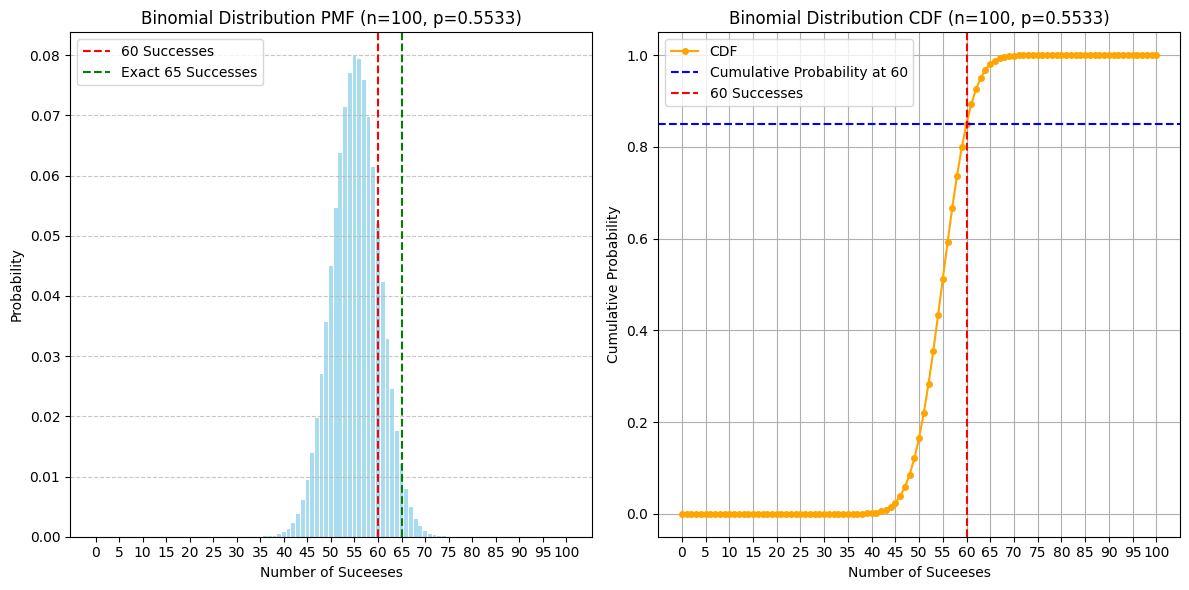

In [276]:
# Plotting the PMF and CDF
plt.figure(figsize=(12,6))
#PMF Plot
plt.subplot(1,2,1)
plt.bar(x, pmf_values, color='skyblue', alpha=0.7)
plt.title(f"Binomial Distribution PMF (n={trials}, p={p:.4f})")
plt.xlabel("Number of Suceeses")
plt.ylabel("Probability")
plt.xticks(np.arange(0, trials+1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=min_desired_successes, color='red', linestyle='--', label = '60 Successes')
plt.axvline(x=65, color='green', linestyle='--', label = 'Exact 65 Successes')
plt.legend()

# CDF Plot
plt.subplot(1,2,2)
plt.plot(x, cdf_values, marker='o', color='orange', label = 'CDF', markersize=4)
plt.title(f"Binomial Distribution CDF (n={trials}, p={p:.4f})")
plt.xlabel("Number of Suceeses")
plt.ylabel("Cumulative Probability")
plt.xticks(np.arange(0, trials+1, 5))
plt.grid()
plt.axhline(y=cumulative_prob, color='blue', linestyle='--', label = 'Cumulative Probability at 60')
plt.axvline(x=min_desired_successes, color='red', linestyle='--', label = '60 Successes')
plt.legend()
plt.tight_layout()
plt.show()



## Another dataset for PMF and CDF

In [277]:
diabetes_df = pd.read_csv('./data_pd/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [278]:
def classify_diabetes(row):
    Glucose = row['Glucose']
    if Glucose > 126:
        return 1
    else:
        return 0

In [279]:
diabetes_df['Diabetes_binary'] = diabetes_df.apply(classify_diabetes, axis=1)

In [280]:
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes_binary
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [281]:
n = len(diabetes_df) 
n

768

In [282]:
k = diabetes_df['Diabetes_binary'].sum() #288
k
hypothetical_k = 50

In [283]:
p = k/n
p

0.375

In [284]:
# Defined number of trials for binomial distribution
trials = 100

# Binomial distribution of exactly k success in trials
probability = binom.pmf(hypothetical_k, trials, p)      #0.0031580439037465443
probability

# Exact Binomial Probability for 50% success (50 out of 100 trials)
min_desired_successes = int(0.5*trials)
exact_probability_50 = binom.pmf(min_desired_successes, trials, p)      #2.6017196352308535e-068
# exact_probability_40

# just to calculate it at 50% success
exact_probability_45 = binom.pmf(45,trials,p)   #1.6116612413091298e-08
# exact_probability_50

In [285]:
# Cumulative probabilty for 60% success (60 out of 100 trials)
cumulative_prob = binom.cdf(min_desired_successes, trials,p)        #0.9999983782876902
# cumulative_prob

In [286]:
print(f"Total Trials (n): {n}")
print(f"Number of diabetic (k): {k}")
print(f"Probability of diabetic (p): {p:.4f}")
print(f"Binomial Probability of exactly {hypothetical_k} diabetic in {trials} trials: {probability:.4f}")
print(f"Exact Binomial probability at 50% diabetic (50 out of {trials}) : {exact_probability_50:.4f}")
print(f"Cumulative probability at 50 or fewer diabetic in {trials} trials : {cumulative_prob:.4f}")
print(f"Exact Binomial probability at 45% success (45 out of {trials}) : {exact_probability_45:.4f}")

Total Trials (n): 768
Number of diabetic (k): 288
Probability of diabetic (p): 0.3750
Binomial Probability of exactly 50 diabetic in 100 trials: 0.0032
Exact Binomial probability at 50% diabetic (50 out of 100) : 0.0032
Cumulative probability at 50 or fewer diabetic in 100 trials : 0.9959
Exact Binomial probability at 45% success (45 out of 100) : 0.0247


In [287]:
# Generate x values (number of successes from 0 to 100)
x = np.arange(0, trials + 1)
# Calcualte the PMF for each number of successes
pmf_values = binom.pmf(x,trials,p)

# Calculate the CDF for each number of successes
cdf_values = binom.cdf(x,trials,p)
# pmf_values,cdf_values

SyntaxError: keyword argument repeated: x (2552755704.py, line 25)

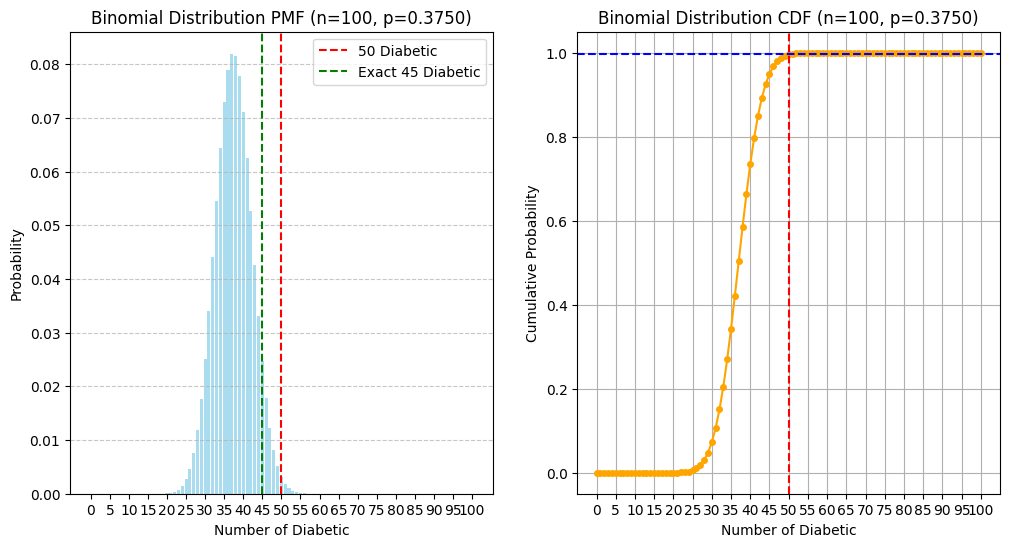

In [288]:
# Plotting the PMF and CDF
plt.figure(figsize=(12,6))
#PMF Plot
plt.subplot(1,2,1)
plt.bar(x, pmf_values, color='skyblue', alpha=0.7)
plt.title(f"Binomial Distribution PMF (n={trials}, p={p:.4f})")
plt.xlabel("Number of Diabetic")
plt.ylabel("Probability")
plt.xticks(np.arange(0, trials+1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=min_desired_successes, color='red', linestyle='--', label = '50 Diabetic')
plt.axvline(x=45, color='green', linestyle='--', label = 'Exact 45 Diabetic')
plt.legend()

# CDF Plot
plt.subplot(1,2,2)
plt.plot(x, cdf_values, marker='o', color='orange', label = 'CDF', markersize=4)
plt.title(f"Binomial Distribution CDF (n={trials}, p={p:.4f})")
plt.xlabel("Number of Diabetic")
plt.ylabel("Cumulative Probability")
plt.xticks(np.arange(0, trials+1, 5))
plt.grid()
plt.axhline(y=cumulative_prob, color='blue', linestyle='--', label = 'Cumulative Probability at 50')
plt.axvline(x=min_desired_successes, color='red', linestyle='--', label = '50 Diabetic')
plt.fill_between(x=0, x=100)
plt.legend()
plt.tight_layout()
plt.show()

# Discrete Poisson Distribution

In [ ]:
import math

In [ ]:
# Define the setting
Lambda = 8
x = 4

# Apply the formula
p_4 = (math.e**-Lambda)*(Lambda**x)/ math.factorial(x)

# Print the result
print(f"The probability of 4 defective product in a day: {p_4:.3f}")
print("In percentage: " + str((p_4*100)))

The probability of 4 defective product in a day: 0.057
In percentage: 5.7252288495362045


In [ ]:
from scipy.stats import poisson

Lambda = 3

# Calculate PMF for 4 defective products
p_4 = poisson.pmf(4, Lambda)

# Calculate CDF for up to 4 defective products
cdf_4 = poisson.cdf(4, Lambda)

print("THe probability of 4 defective products in a  day (PMF): {:.3f}".format(p_4))
print("THe cumulative probability of up to 4 defective products in a  day (CDF): {:.3f}".format(cdf_4))


THe probability of 4 defective products in a  day (PMF): 0.168
THe cumulative probability of up to 4 defective products in a  day (CDF): 0.815


## Dataset of insurance salesman example
    - A life insurance salesman sells on the average 3 life insurance policy per week. Use poisson's law to calculate the probability
    - a. In a given week he will sell some policies.
    - b. In a given week, he will sell 2 or more policies but not more than 5 policies.
    - c. Assuming that per week, there are 5 working days, what is the probability that on a given day, he will sell one policiy?

In [ ]:
# Lambda = 3
# cdf_a = poisson.cdf(1,Lambda)
# print("Probability that In a given week he will sell some policies. : {:.3f}".format(1-cdf_a) )
# cdf_2 = poisson.cdf(1, Lambda)
# cdf_5 = poisson.cdf(5, Lambda)
# cdf_b = cdf_5 - cdf_2
# print("In a given week, probability that he will sell 2 or more policies but not more than 5 policies. : {:.3f}".format(cdf_b) )


Probability that In a given week he will sell some policies. : 0.801
In a given week, probability that he will sell 2 or more policies but not more than 5 policies. : 0.717


In [ ]:
# Lambda = 3/5
# cdf_c = poisson.cdf(1,Lambda)
# print("Probability that In a given week of 5 days he will sell one policies. : {:.3f}".format(1-cdf_c) )

Probability that In a given week of 5 days he will sell one policies. : 0.122


In [ ]:
from scipy.stats import poisson

# Average number of policies sold per week
lambda_week = 3

# a. Probability of selling some policies in a given week
# Selling "some policies" means selling at least 1 (1 or more)
p_some_policies = 1 - poisson.pmf(0, lambda_week)
print(f"a. Probability of selling some policies: {p_some_policies:.4f}")

# b. Probability of selling 2 or more policies but not more than 5 policies
# This includes selling 2, 3, 4, or 5 policies
p_2_to_5_policies = sum(poisson.pmf(k, lambda_week) for k in range(2, 6))
print(f"b. Probability of selling 2 to 5 policies: {p_2_to_5_policies:.4f}")

# c. Probability of selling one policy on a given day
# Average number of policies sold per day (lambda_day = lambda_week / 5)
lambda_day = lambda_week / 5
p_one_policy_day = poisson.pmf(1, lambda_day)
print(f"c. Probability of selling one policy on a given day: {p_one_policy_day:.4f}")

p_3_next_week = poisson.pmf(3, lambda_week)
print(f"d. Probability of selling 3 policy next week: {p_3_next_week:.4f}")



a. Probability of selling some policies: 0.9502
b. Probability of selling 2 to 5 policies: 0.7169
c. Probability of selling one policy on a given day: 0.3293
d. Probability of selling 3 policy next week: 0.2240


In [ ]:

Lambda = 3

# Calculate PMF for 4 defective products
p_4 = poisson.pmf(4, Lambda)
p_3 = poisson.pmf(3, Lambda)
p_2 = poisson.pmf(2, Lambda)
p_1 = poisson.pmf(1, Lambda)
p_0 = poisson.pmf(0, Lambda)
pp = p_0 + p_1 + p_2+ p_3 + p_4

# Calculate CDF for up to 4 defective products
cdf_4 = poisson.cdf(4, Lambda)

print("THe probability of 4 defective products in a  day (PMF): {:.3f}".format(pp))
print("THe cumulative probability of up to 4 defective products in a  day (CDF): {:.3f}".format(cdf_4))

THe probability of 4 defective products in a  day (PMF): 0.815
THe cumulative probability of up to 4 defective products in a  day (CDF): 0.815


## Hospital Data Example


In [ ]:
hospital_df = pd.read_csv("./data_pd/hospital_visits.csv")
hospital_df.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia


In [ ]:
# COnvert columns to datetime
hospital_df['START'] = pd.to_datetime(hospital_df['START'])
hospital_df['STOP'] = pd.to_datetime(hospital_df['STOP'])

In [ ]:
# Calculate the time difference in hours
hospital_df['DURATION'] = (hospital_df['STOP'] - hospital_df['START']).dt.total_seconds() / 3600     # Duration in hours
hospital_df.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,DURATION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN,3.533333
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN,0.284167
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN,0.250000
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03 16:24:45+00:00,2011-01-03 16:39:45+00:00,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN,0.250000
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53+00:00,2011-01-03 17:51:53+00:00,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia,0.250000


In [ ]:
# Compute the avergae event per time unit (here, hours)
avg_duration = hospital_df["DURATION"].mean()
print(f"Average duration: {avg_duration} hours")

Average duration: 7.265994695620651 hours


In [ ]:
# Define range for Poisson's distribution (e.g around the averge)
k = range(int(avg_duration) - 5, int(avg_duration) + 6)    # +/- 5 hours from average
probabilities = poisson.pmf(k, avg_duration)
k

range(2, 13)

In [ ]:
# Print Probabilities
print("Poisson probabilities for each k:")
for duration, prob in zip(k, probabilities):
    print(f"{duration} hours: {prob}")

Poisson probabilities for each k:
2 hours: 0.018449251680549172
3 hours: 0.04468405494968024
4 hours: 0.08116852656079951
5 hours: 0.11795401668842276
6 hours: 0.14284220993087143
7 hours: 0.14827010566692064
8 hours: 0.13466622516186974
9 hours: 0.10872045307837803
10 hours: 0.07899622353729686
11 hours: 0.05218055829055117
12 hours: 0.03159530497947241


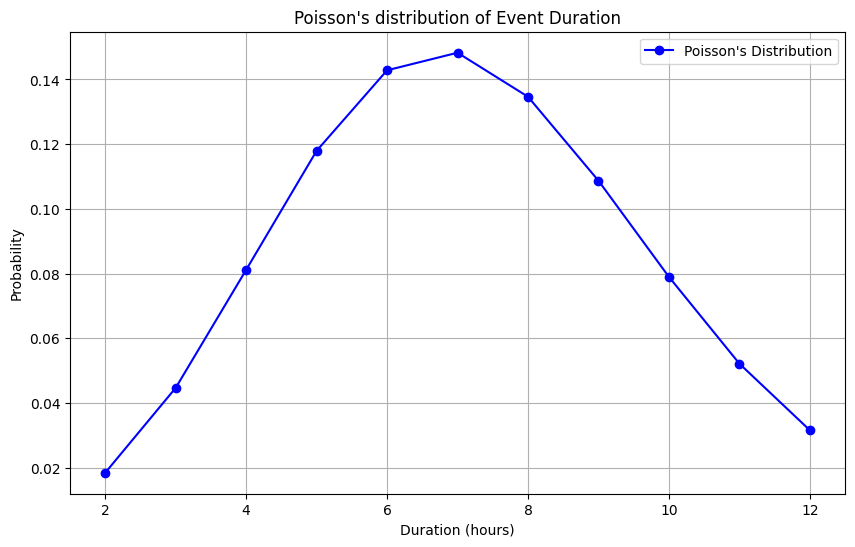

In [ ]:
# Plot Poisson's distribution 
plt.figure(figsize=(10,6))
plt.plot(k, probabilities, label="Poisson's Distribution", marker='o' , color='blue')
plt.xlabel("Duration (hours)")
plt.ylabel("Probability")
plt.title("Poisson's distribution of Event Duration")
plt.legend()
plt.grid(True)
plt.show()

## Retail Data Transaction Example

    - For the Retail_Data_Transactions.csv dataset, find the average number of daily transactions. Estimate and plot the probabilities of average +/- 10 transaction. Use Poisson's distribution

In [ ]:
retail_df = pd.read_csv("./data_pd/Retail_Data_Transactions.csv")
retail_df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [ ]:
retail_df.count()

customer_id    125000
trans_date     125000
tran_amount    125000
dtype: int64

In [ ]:
# len(retail_df['trans_date'].unique())
k['average'] = retail_df.groupby('trans_date')['tran_amount'].mean()


In [ ]:
avg = k['average'].mean()
avg

65.02205257619404

In [ ]:
k = range(int(avg) - 10, int(avg) + 10)    # +/- 10  from average
probabilities = poisson.pmf(k, avg)
k

range(55, 75)

In [ ]:
print("Poisson probabilities for each k:")
for transactions, prob in zip(k, probabilities):
    print(f"$ {transactions} : {prob}")

Poisson probabilities for each k:
$ 55 : 0.023764997529943457
$ 56 : 0.027593730694020286
$ 57 : 0.03147721066596451
$ 58 : 0.0352881525323138
$ 59 : 0.038889967953778436
$ 60 : 0.04214509234961633
$ 61 : 0.044923941157136965
$ 62 : 0.0471136590943428
$ 63 : 0.0486258225188783
$ 64 : 0.049402356068485614
$ 65 : 0.04941911682573723
$ 66 : 0.04868685473503333
$ 67 : 0.04724954072165278
$ 68 : 0.04518032530888846
$ 69 : 0.04257561576295676
$ 70 : 0.03954791323718439
$ 71 : 0.03621811963080282
$ 72 : 0.03270800665062257
$ 73 : 0.02913344833012836
$ 74 : 0.025598873095236466


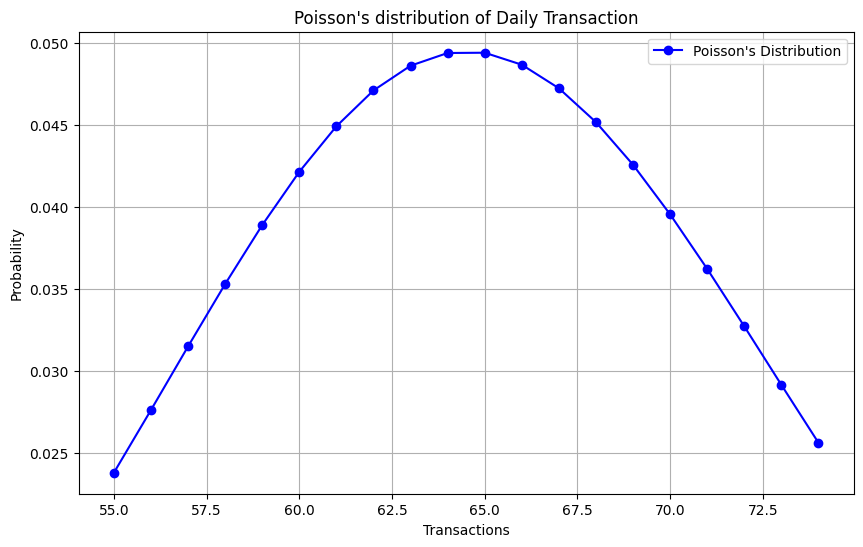

In [ ]:
# Plot Poisson's distribution 
plt.figure(figsize=(10,6))
plt.plot(k, probabilities, label="Poisson's Distribution", marker='o' , color='blue')
plt.xlabel("Transactions")
plt.ylabel("Probability")
plt.title("Poisson's distribution of Daily Transaction")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# k['average'] = retail_df.groupby('trans_date').mean()
# ls['avg1'] = retail_df.groupby('trans_date').count().tran_amount

In [ ]:
# n = ls['avg1'].mean()
# n

89.22198429693077

# Geometric Distribution

In [ ]:
df = pd.read_csv("./data_pd/tips.csv")

In [ ]:
# Define threshold for generous tipper
avg_tip = df['tip'].mean()
generous_tipper = df[df['tip'] > avg_tip]



<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Calculate the probability of a generous tipper
p = len(generous_tipper)/ len(df)
print(p)
# Probability that a customer giving above average tip = around 49.5%

0.4959016393442623


In [ ]:
# Expected number of customer until first generous tipper (geometric distribution)
# As we know : expected value of geometric distribution is : 1/p
expected_trials = 1/p

# To get the first generous tipper we would need to wait for 2 customers


2.0165289256198347

In [ ]:
# Simulate the geometric distribution for demonstration
# geometric(p): This function generates random values following a geometric distribution, which models the number of trials (or attempts)
# required before the first success occur.
# p is the probability of success on each trial
# (i.e the probability of a customer tipping generously).
# Set the probability of success p (0.5 to get an expected of 2 trails)
p = 0.4950
# Simulate the geometric distribution for 1000 trials
simulated_trials = np.random.geometric(p, size=1000)
simulated_trials

array([ 2,  2,  1,  3,  1,  1,  1,  5,  1,  3,  2,  2,  2,  4,  1,  1,  1,
        1,  3,  1,  1,  2,  1,  2,  6,  1,  4,  3,  1,  4,  3,  2,  1,  3,
        3,  1,  1,  1,  3,  2,  1,  2,  2,  1,  2,  1,  3,  3,  1,  1,  2,
        2,  1,  1,  4,  6,  1,  1,  3,  2,  3,  1,  5,  1,  1,  4,  1,  4,
        1,  1,  1,  2,  1,  4,  1,  4,  1,  1,  4,  3,  1,  1,  6,  1,  3,
        1,  1,  1,  1,  1,  1,  2,  2,  3,  1,  1,  3,  2,  1,  2,  1,  1,
        4,  1,  2,  3,  2,  1,  2,  1,  2,  1,  1,  2,  4,  1,  1,  1,  1,
        4,  1,  2,  1,  3,  1,  1,  4,  1,  1,  4,  1,  2,  9,  4,  3,  1,
        5,  2,  1,  3,  1,  1,  1,  1,  7,  3,  3,  2,  1,  1,  2,  1,  1,
        2,  1,  1,  1,  1,  4, 10,  2,  5,  5,  1,  1,  2,  1,  2,  4,  1,
        3,  1,  3,  1,  3,  2,  3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  4,
        1,  2,  1,  2,  9,  3,  1,  2,  1,  1,  4,  1,  2,  1,  1,  1,  3,
        1,  1,  1,  1,  2,  1,  5,  4,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  4,  2

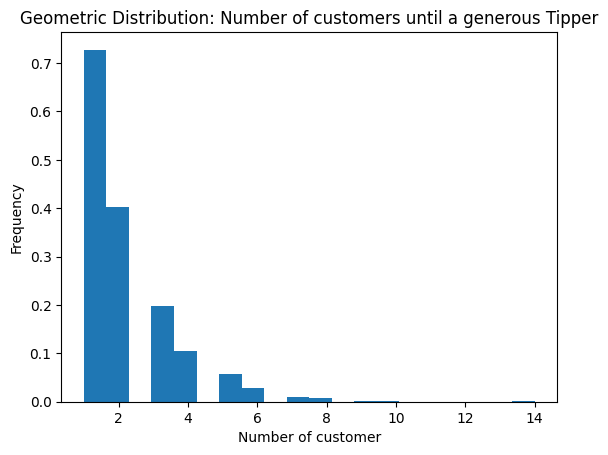

In [ ]:
# plot the distribution
plt.hist(simulated_trials, bins=20, density=True)
plt.title("Geometric Distribution: Number of customers until a generous Tipper")
plt.xlabel("Number of customer")
plt.ylabel("Frequency")
plt.show()

## Titanic Dataset example

    - How many passengers do we need to skip before we see first surviving passenger?

In [ ]:
df_titanic = pd.read_csv("./data_pd/tested.xls")

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [294]:
survivors = df_titanic['Survived'].mean()
survivors

0.36363636363636365

In [295]:
p = 1/survivors
p

2.75

In [296]:
p = survivors
# Simulate the geometric distribution for 1000 trials
simulated_trials = np.random.geometric(p, size=1000)
simulated_trials

array([ 9,  7,  2,  1,  3,  2,  4,  7,  1,  5,  3,  5,  3,  1,  1,  2,  7,
        1,  3,  1,  1,  1,  2,  1,  3,  1,  2,  1,  1,  1,  2,  2,  3,  1,
        3,  1,  7,  1,  3,  2,  6,  3,  2,  1,  3,  1,  8,  4,  1,  5,  1,
        4,  4,  1,  6,  4,  3,  1,  1,  2,  1,  1,  4,  3,  4,  3,  1,  7,
        1,  6,  1,  1,  2,  1,  5,  1,  2,  2,  1,  1,  4,  5,  2,  3,  3,
        2,  1,  6,  1,  3,  5,  5,  6,  3,  3,  4,  2,  1,  5,  5,  5,  1,
        1,  6,  1,  1,  4,  2,  4,  3,  6,  3,  1,  2,  2,  1,  2,  2,  2,
        2,  3,  1,  2,  3,  1,  6,  4,  3,  5,  4,  2,  5,  3,  1,  2,  2,
        1,  2,  1,  2,  7,  1,  4,  1,  1,  3,  1,  5,  4,  4,  4,  7,  2,
        3,  3,  1,  2,  2,  2,  1,  8,  3,  1,  1,  2,  5,  1,  1,  7,  4,
        3,  1, 12,  3,  1,  2,  2,  3,  2,  2,  4,  1,  4,  2,  5,  3,  2,
        2,  7,  1,  8,  2,  2,  1,  5,  5,  1,  1,  2,  2,  1,  2,  3,  4,
        1,  2,  2,  2,  2,  3,  5,  1,  1,  5,  4,  2,  2,  2,  6,  1,  1,
        4,  2,  1,  1,  1

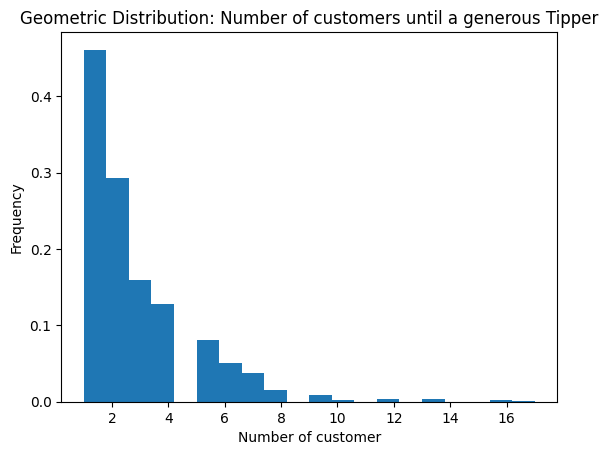

In [297]:
# plot the distribution
plt.hist(simulated_trials, bins=20, density=True)
plt.title("Geometric Distribution: Number of customers until a generous Tipper")
plt.xlabel("Number of customer")
plt.ylabel("Frequency")
plt.show()